# Big data Courseowork

## Loading the data into dataframes

In [1]:
import pandas as pd
#daily visitor
dailyVisotor = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueDailyVisitors.csv', index_col=0)
dailyVisotor.head(10)

,WRL,XPE,DKS,AEQ,XLA,UFY,XJT,WFI,AXM,QRY,...,PXI,YVW,PDT,ZFX,AWF,UZO,SJU,BKI,SPF,QJL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,79,80,195,0,71,58,73,93,65,295,...,543,0,305,88,174,54,565,0,581,268
2019-01-02,93,94,241,0,100,86,83,86,51,240,...,446,0,269,89,203,85,499,0,503,261
2019-01-03,65,78,111,0,101,62,73,83,74,219,...,392,0,222,82,127,67,459,0,456,226
2019-01-04,71,63,122,0,80,60,78,103,60,202,...,346,0,215,85,110,64,386,0,357,180
2019-01-05,84,54,135,0,79,46,50,73,53,166,...,361,0,269,95,101,78,387,0,355,201
2019-01-06,80,87,164,0,78,70,76,89,50,207,...,402,0,129,85,136,62,402,0,452,209
2019-01-07,86,91,217,0,87,77,80,107,55,259,...,490,0,292,84,128,77,595,0,534,243
2019-01-08,76,75,205,0,98,80,96,88,65,267,...,497,0,348,90,192,59,560,0,562,271
2019-01-09,96,71,190,0,84,62,65,87,64,264,...,494,0,225,77,171,64,499,0,521,284


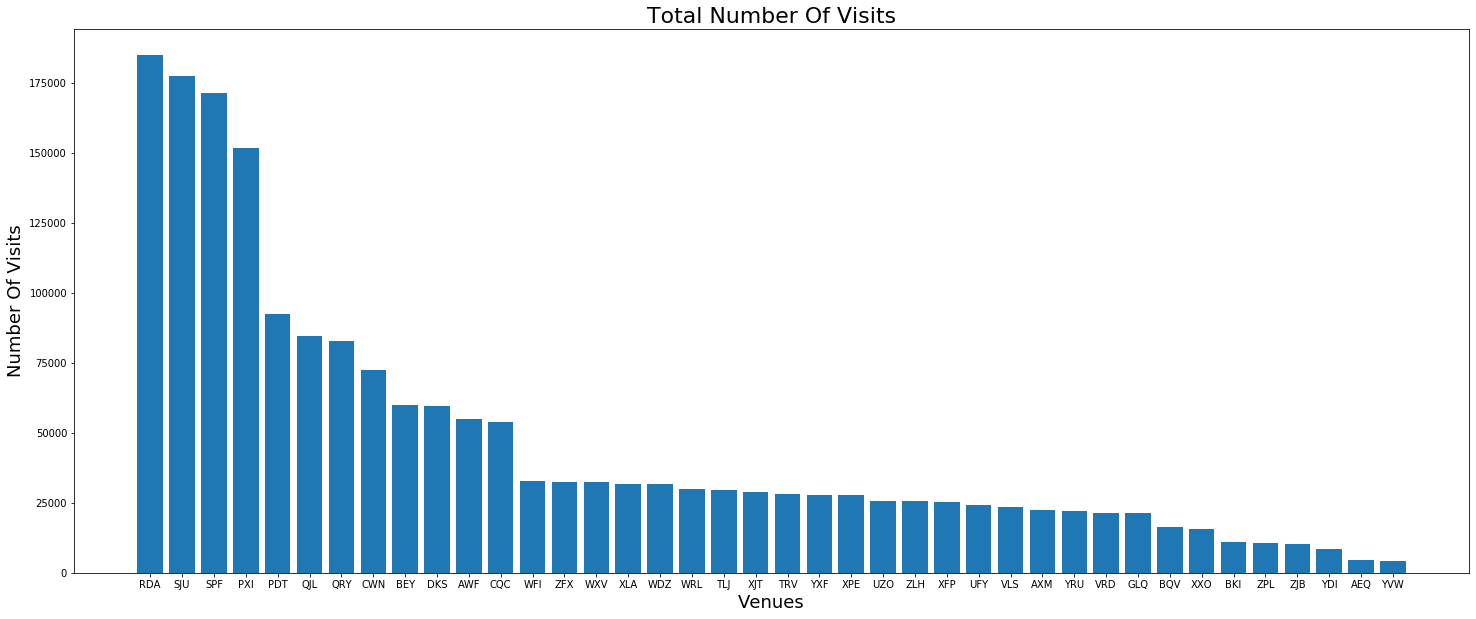

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dailyVisotor = dailyVisotor.reindex(dailyVisotor.sum().sort_values(ascending=False).index, axis=1)
plt.figure(figsize=(25, 10))
x_pos = np.arange(len(dailyVisotor.columns))
plt.bar(x_pos, dailyVisotor.sum(), align='center')
plt.xticks(x_pos, dailyVisotor.columns)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Number Of Visits', fontsize=18)
plt.title('Total Number Of Visits', fontsize=22)
plt.show()

In [3]:
# median venue has 28,4447 total number of visitors 
# using venues that are close to the medium to produce reliable trendlines 
# XJT     28785
# TRV     28109
# YXF     27817
dailyVisotor.sum()
dailyVisotor.sum().describe()

count        40.000000
mean      46831.800000
std       47333.927179
min        4380.000000
25%       22050.750000
50%       28447.000000
75%       56021.500000
max      185006.000000
dtype: float64

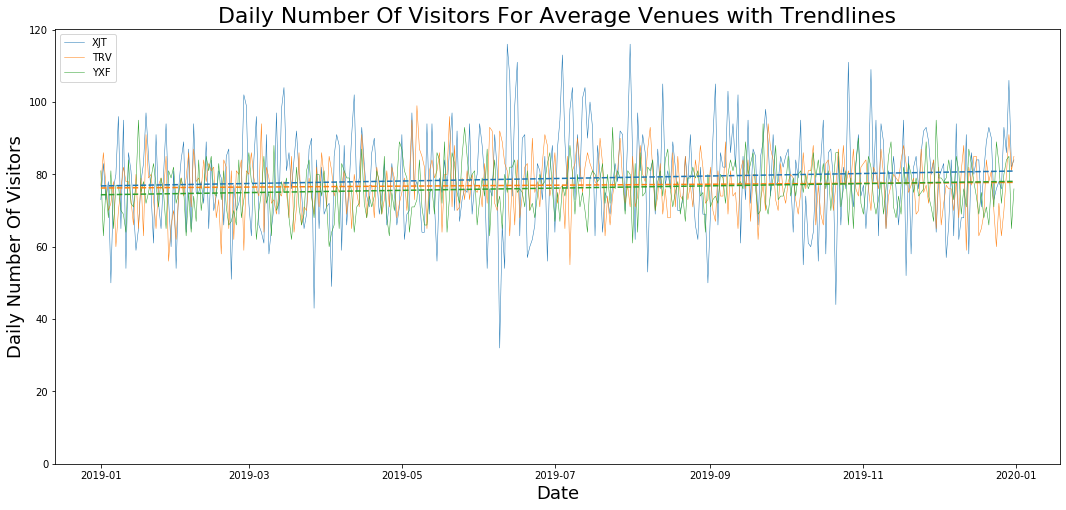

In [4]:
selected = ['XJT', 'TRV', 'YXF']
pd.plotting.register_matplotlib_converters()
dailyVisotor.index = pd.to_datetime(dailyVisotor.index)
plt.figure(figsize=(18, 8))
plt.plot(dailyVisotor[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(dailyVisotor[name]))
    z = np.polyfit(x, dailyVisotor[name], 1)
    trend = np.poly1d(z)
    plt.plot(dailyVisotor.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Number Of Visitors', fontsize=18)
plt.title('Daily Number Of Visitors For Average Venues with Trendlines', fontsize=22)
plt.legend(selected, loc=2)
plt.show()


In [5]:
AverageAge = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueAge.csv', index_col=0)
Distance = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueDistance.csv ', index_col=0)
Duration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueDuration.csv', index_col=0)
Gender = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueGender.csv', index_col=0)
Revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/001017751/VenueSpend.csv', index_col=0)
TotalNumberOfVisitors = dailyVisotor.sum().values
SummaryData = pd.DataFrame(index = dailyVisotor.columns)
SummaryData['Age'] = AverageAge.values
SummaryData['Distance'] = Distance.values
SummaryData['Gender'] = Gender.values
SummaryData['Average spend(£) by Visitors'] = Revenue.values
SummaryData['Total Number Of Visitors'] = dailyVisotor.sum().values
SummaryData['Revenue'] = (SummaryData['Total Number Of Visitors'] * SummaryData['Average spend(£) by Visitors'])
SummaryData.describe()

,Age,Distance,Gender,Average spend(£) by Visitors,Total Number Of Visitors,Revenue
count,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,39.125000,12.650000,49.875000,20.625000,46831.800000,1.053601e+06
std,10.813542,11.548227,5.039269,7.416847,47333.927179,1.308342e+06
min,22.000000,2.000000,41.000000,9.000000,4380.000000,5.256000e+04
25%,30.750000,6.000000,46.000000,15.750000,22050.750000,3.007985e+05
50%,39.500000,9.000000,49.000000,19.000000,28447.000000,5.954130e+05
75%,46.750000,15.000000,54.000000,23.500000,56021.500000,1.170414e+06
max,55.000000,62.000000,59.000000,42.000000,185006.000000,6.337582e+06


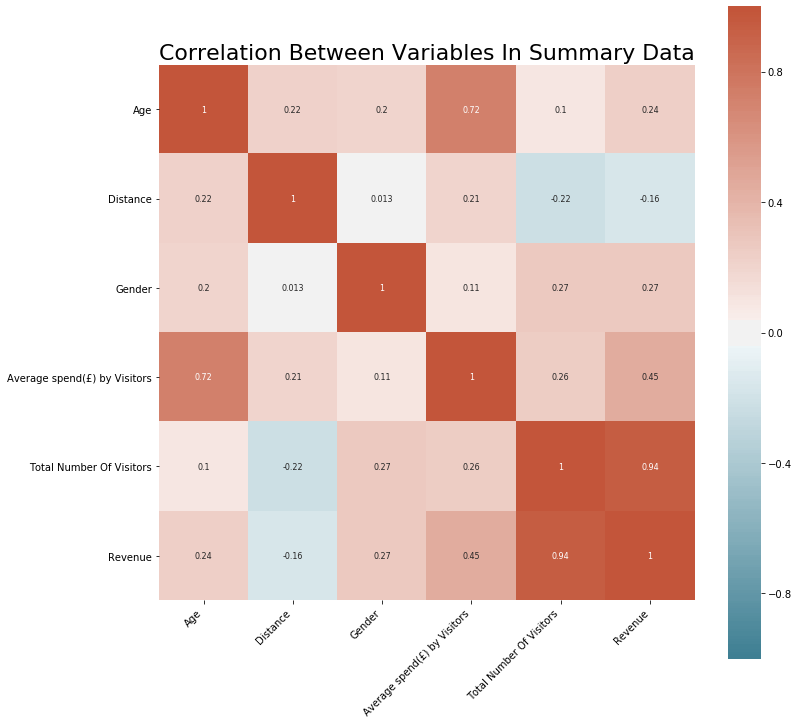

In [6]:
plt.figure(figsize=(12, 12))
corr = SummaryData.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
plt.title('Correlation Between Variables In Summary Data', fontsize=22)
plt.show()


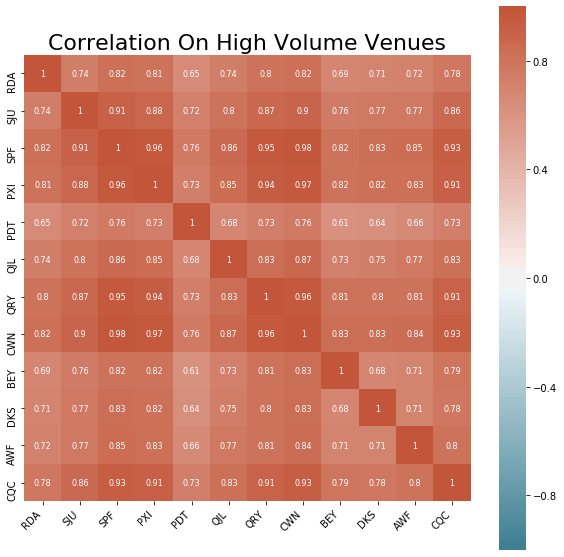

In [7]:
selected = dailyVisotor.columns[dailyVisotor.sum() > 50000]

plt.figure(figsize=(10, 10))
corr = dailyVisotor[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
plt.title("Correlation On High Volume Venues",fontsize=22)
plt.show()


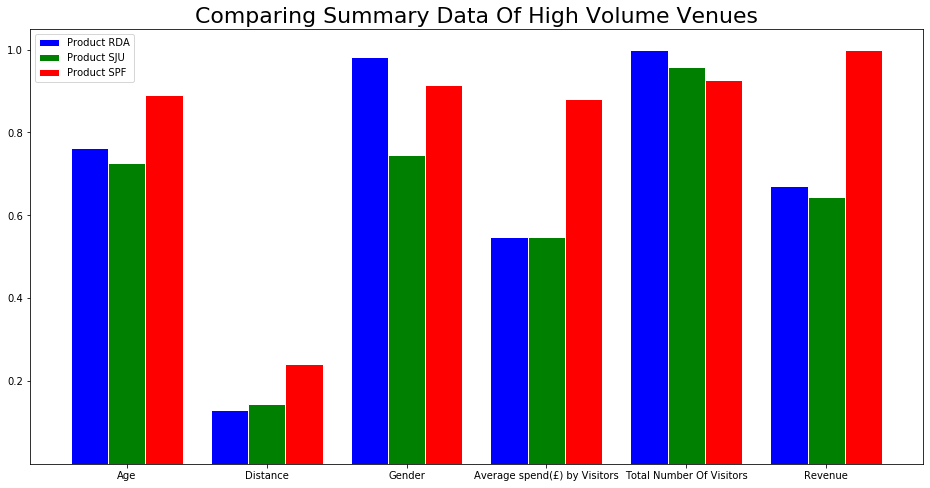

In [8]:
normalised_data = SummaryData / SummaryData.max()
selected = ['RDA', 'SJU', 'SPF']  # high volume
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 8))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(SummaryData.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
        width=bar_width, edgecolor='white', label='Product ' + name)
    c += 1
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, SummaryData.columns)
plt.legend()
plt.title("Comparing Summary Data Of High Volume Venues",fontsize=22)
plt.show()


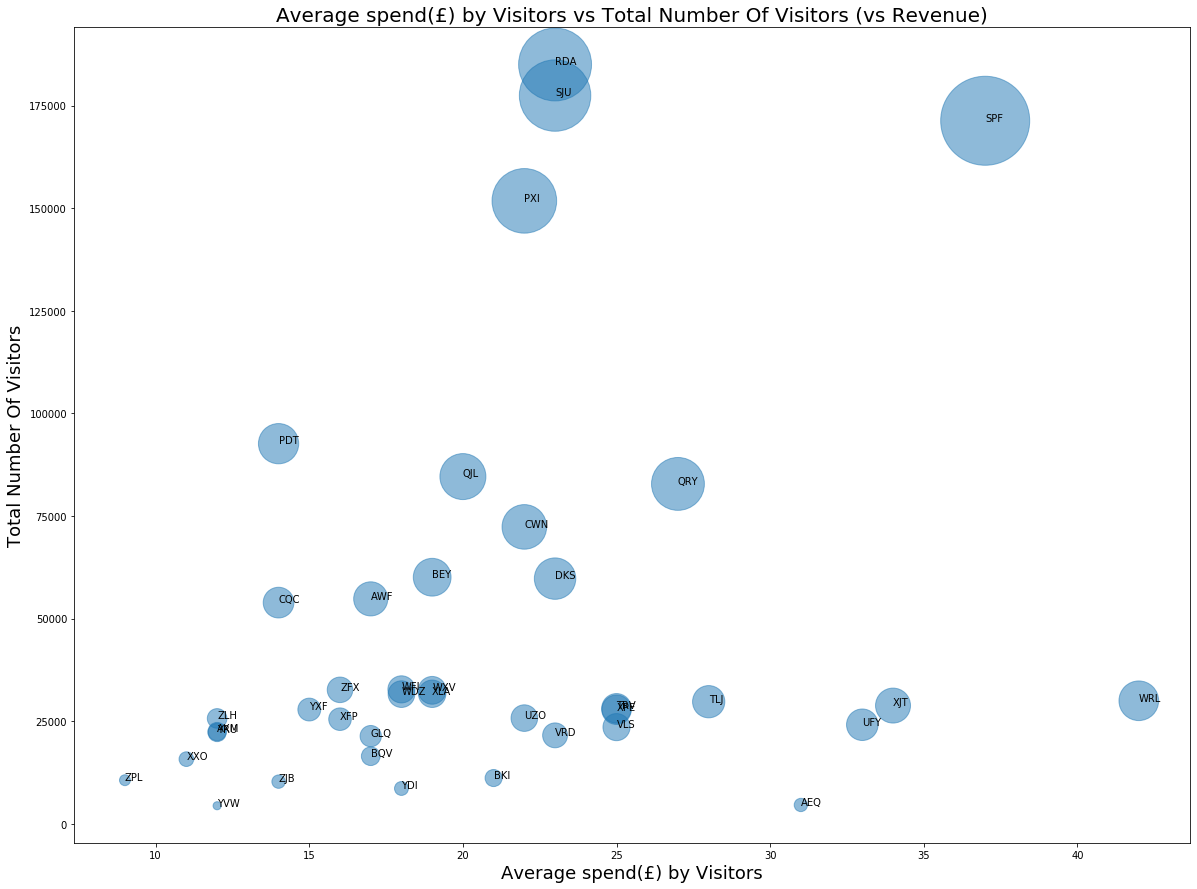

In [9]:
SummaryData['BubbleSize'] = SummaryData['Revenue']/800

plt.figure(figsize=(20, 15))
plt.scatter(SummaryData['Average spend(£) by Visitors'], SummaryData['Total Number Of Visitors'],
         s=SummaryData['BubbleSize'], alpha=0.5)

plt.title('Average spend(£) by Visitors vs Total Number Of Visitors (vs Revenue)', fontsize=20)
plt.xlabel('Average spend(£) by Visitors', fontsize=18)
plt.ylabel('Total Number Of Visitors', fontsize=18)
for i, name in enumerate(SummaryData.index):
    plt.annotate(name, (SummaryData['Average spend(£) by Visitors'][i], SummaryData['Total Number Of Visitors'][i]))

plt.show()
